In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For measuring our models performance
from sklearn import metrics
from time import time

# Import various model stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

import statsmodels

In [118]:
df = pd.read_csv('Swan_Project_Data.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(7043, 31)

In [8]:
df.CustomerID.nunique()

7043

In [9]:
df.Country.unique()

array(['United States'], dtype=object)

In [10]:
df.State.unique()

array(['California'], dtype=object)

In [11]:
df.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [12]:
df.City.nunique()

1129

In [ ]:
#Lat long need to be checked

In [14]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [80]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(df) #Display the table

,null,percent
Churn Reason,5174,73.463
Internet Service,0,0.000
Churn Value,0,0.000
Churn Label,0,0.000
Total Charges,0,0.000
Monthly Charges,0,0.000
Payment Method,0,0.000
Paperless Billing,0,0.000
Contract,0,0.000
Streaming Movies,0,0.000


In [19]:
df['Churn Value'][df['Churn Label'] == 'Yes'].value_counts()

1    1869
Name: Churn Value, dtype: int64

In [20]:
df['Churn Value'][df['Churn Label'] == 'No'].value_counts()

0    5174
Name: Churn Value, dtype: int64

In [23]:
df['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [25]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [33]:
import re

In [81]:
# # Checking the format of Total charges because we can't cast float dtype
# df['Total Charges'].strip().astype(float)

# #str.findall('[^0-9A-Za-z]+')

In [4]:
# Indexes, where total charge is blank: 2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840

empty_string_indices = df[df['Total Charges'] == ' '].index
empty_string_indices

Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

In [15]:
#Filling missing total charge values with 0
df['Total Charges'] = df['Total Charges'].fillna(value = 0)

In [78]:
df['Total Charges'].isnull().sum()

0

In [14]:
#Changing total chares to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [16]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
#Sanity check failed
df['Total Charges'] == df['Tenure Months'] * df['Monthly Charges']
#Ask Alex what to do with missing values of Total Charges
#We could create a new column for additional charges: total - (months * monthly charges)

In [79]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


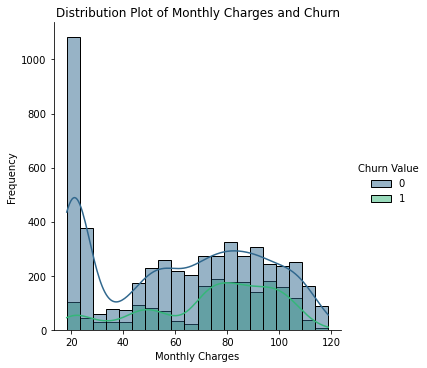

In [85]:
#Is churn related to amount of monthly charges?
sns.displot(data=df, x='Monthly Charges', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Monthly Charges and Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

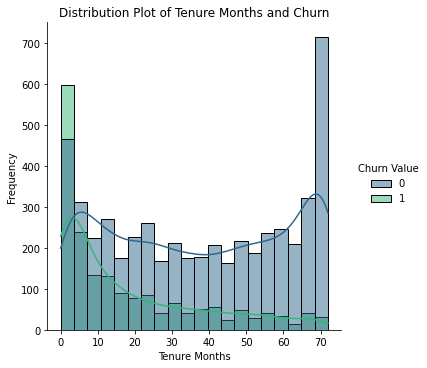

In [86]:
#Is churn related to duration of service?
sns.displot(data=df, x='Tenure Months', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Tenure Months and Churn')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [87]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [17]:
# list of columns with yes's and no's
yn_cols = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
# mapping
for col in yn_cols:
    df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No internet service':0, 'No phone service':0, 'Male':1, 'Female':0})
    #df[f'{col}'].astype(int)
    
# check thats all they have
for col in yn_cols:
    print(f'The column {col} contains these values {df[col].unique()}')

The column Gender contains these values [1 0]
The column Senior Citizen contains these values [0 1]
The column Partner contains these values [0 1]
The column Dependents contains these values [0 1]
The column Phone Service contains these values [1 0]
The column Multiple Lines contains these values [0 1]
The column Online Security contains these values [1 0]
The column Online Backup contains these values [1 0]
The column Device Protection contains these values [0 1]
The column Tech Support contains these values [0 1]
The column Streaming TV contains these values [0 1]
The column Streaming Movies contains these values [0 1]
The column Paperless Billing contains these values [1 0]


In [ ]:
matrix = df.corr(numeric_only=True)

plt.figure(figsize = (12, 12))
sns.heatmap(matrix,
            cmap = 'RdBu_r',
            annot=True,
            fmt = '.1',
            mask = np.triu(matrix))

plt.show()

In [18]:
features = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value']

In [20]:
df_model = df[features].copy()

In [21]:
df_model = pd.get_dummies(data = df_model, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype=int)
df_model = pd.get_dummies(data = df_model, columns = ['Contract'], prefix='Con', drop_first=False, dtype=int)
df_model = pd.get_dummies(data = df_model, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype=int)

In [58]:
feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Con_Month-to-month',
       'Con_One year', 'Con_Two year', 'Pay_Bank transfer (automatic)',
       'Pay_Credit card (automatic)', 'Pay_Electronic check',
       'Pay_Mailed check']

X_train, X_test, y_train, y_test = train_test_split(df_model[feature_cols], df_model['Churn Value'], test_size = 0.2, random_state = 42)

In [23]:
rf = RandomForestClassifier(n_estimators=50) # Random Forest

In [42]:
## Check respective cross validation scores if overfitting need to tune as shown below

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
 
#Step 1: Select parameters
rf_params = {

    'n_estimators': [175, 200, 225], # 3 options

    'max_depth': [6, 7, 8],
    
    'max_features':[5, 6, 7],
    
    'min_samples_leaf':[2, 3],
}

# Create a grid search object

gs = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose = 1) # k = 5

# Fit grid search on the training set

gs.fit(X_train, y_train)

# Save my best model as a random forest model

best_rf = gs.best_estimator_

# I use the model to predict on X_train

y_pred = best_rf.predict(X_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [43]:
gs.best_estimator_

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=2,
                       n_estimators=200)

In [34]:
def apr(y_pred, y_real):

    accuracy = metrics.accuracy_score(y_real, y_pred)

    precision = metrics.precision_score(y_real, y_pred)

    recall = metrics.recall_score(y_real, y_pred)

    f1 = metrics.f1_score(y_real, y_pred)

    

    print(f"Accuracy:{accuracy}")

    print(f"Precision:{precision}")

    print(f"Recall:{recall}")

    print(f"F1:{f1}")

    return accuracy, precision, recall, f1

In [ ]:
# base:
# Accuracy:0.8097266595669151
# Precision:0.7212931995540691
# Recall:0.4404356705241661
# F1:0.5469146238377007

In [ ]:
# including max_features:
# Accuracy:0.8102591409300675
# Precision:0.7105263157894737
# Recall:0.45949625595643295
# F1:0.5580818520049607

In [ ]:
#     'n_estimators': [100, 150, 200, 300], # 3 options

#     'max_depth': [None, 3, 4, 5, 7],
    
#     'max_features':[5, 7]
#     cv = 5
# Accuracy:0.8267660631877884
# Precision:0.717948717948718
# Recall:0.5527569775357386
# F1:0.6246153846153846

In [44]:
apr(y_pred, y_train)

Accuracy:0.8262335818246361
Precision:0.7164310954063604
Recall:0.552076242341729
F1:0.6236063052672048


(0.8262335818246361, 0.7164310954063604, 0.552076242341729, 0.6236063052672048)

In [40]:
print(list(zip(X_train.columns, best_rf.feature_importances_)))

[('Gender', 0.0025278080812622915), ('Senior Citizen', 0.006034382045082255), ('Partner', 0.004975319287202808), ('Dependents', 0.05679249393718682), ('Tenure Months', 0.157408687322887), ('Phone Service', 0.0034626814756349156), ('Multiple Lines', 0.006150404919922603), ('Online Security', 0.01652534118220345), ('Online Backup', 0.006199590518406234), ('Device Protection', 0.002604547610229848), ('Tech Support', 0.010677485914931973), ('Streaming TV', 0.005266908609296769), ('Streaming Movies', 0.005005280425194983), ('Paperless Billing', 0.019622169488879192), ('Monthly Charges', 0.08191732647270715), ('Total Charges', 0.10259363038905712), ('IS_DSL', 0.017294175696330072), ('IS_Fiber optic', 0.11410302034162298), ('IS_No', 0.027812459461876632), ('Con_Month-to-month', 0.1734529459887355), ('Con_One year', 0.020764933277937655), ('Con_Two year', 0.07890088453860253), ('Pay_Bank transfer (automatic)', 0.0019906851507555828), ('Pay_Credit card (automatic)', 0.004257974410412748), ('Pay

In [ ]:
#logistoc reg

In [119]:
# feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
#        'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
#        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
#        'Paperless Billing', 'Monthly Charges', 'Total Charges',
#        'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Con_Month-to-month',
#        'Con_One year', 'Con_Two year', 'Pay_Bank transfer (automatic)',
#        'Pay_Credit card (automatic)', 'Pay_Electronic check',
#        'Pay_Mailed check']

df_x = df.drop('Churn Value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df['Churn Value'], test_size = 0.2, random_state = 42)

In [73]:
df_x.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [120]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    
    ###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'], axis = 1, inplace = True)
    
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Con', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype = int)
    
    # Churn Reason has nulls
#     df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
#   df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=True, dtype = int)

    
    ##### Target Columns - hidden nulls in diguise 
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

In [121]:
X_train_fe = feature_eng(X_train)

In [122]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [123]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [124]:
X_train_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [95]:
X_train_fe.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,IS_Fiber optic,IS_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check,prob_stay,prob_churn,y_pred
2142,0,0,1,0,71,1,1,0,0,1,...,1,0,1,0,1,0,0,0.814387,0.185613,0
1623,1,0,0,0,16,1,0,0,1,1,...,1,0,0,0,1,0,0,0.469827,0.530173,1
6074,1,0,0,0,32,1,1,0,1,1,...,1,0,1,0,1,0,0,0.587713,0.412287,0
1362,1,1,1,0,24,0,0,0,0,1,...,0,0,0,0,1,0,0,0.574058,0.425942,0
6754,1,0,1,1,20,1,0,0,0,0,...,0,1,0,0,0,0,1,0.973452,0.026548,0
1212,1,0,0,0,2,1,1,0,0,0,...,1,0,0,0,0,1,0,0.233862,0.766138,1
2722,1,0,1,0,52,1,0,1,0,1,...,0,0,1,0,0,0,1,0.929582,0.070418,0
4006,1,0,1,0,37,1,0,0,0,0,...,0,1,1,0,0,0,0,0.957290,0.042710,0
6791,1,0,0,0,41,1,1,1,0,1,...,0,0,0,0,0,0,0,0.880530,0.119470,0
5466,0,0,1,1,58,1,0,0,1,0,...,0,0,1,0,1,0,0,0.986746,0.013254,0


In [125]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [126]:
print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

[[3739  426]
 [ 619  850]]


In [127]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [128]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3739  426]
 [ 619  850]] 

The accuracy of your model is: 0.8145189918352858
The recall of your model is: 0.5786249149081008
The precision of your model is: 0.6661442006269592
The F1-score of your model is: 0.6193078324225865


In [129]:
X_test_fe = feature_eng(X_test)

In [130]:
X_test_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test_fe)

In [131]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_churn']>.5, 1, 0)

In [132]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for your predictions is:
[[896 113]
 [169 231]] 

The accuracy of your model is: 0.7998580553584103
The recall of your model is: 0.5775
The precision of your model is: 0.6715116279069767
The F1-score of your model is: 0.6209677419354839


In [133]:
print(list(zip(X_train_fe.columns, lr.coef_[0])))

[('Gender', 0.0801336364940116), ('Senior Citizen', 0.2925718227009908), ('Partner', 0.07778172954942364), ('Dependents', -1.0641045857206994), ('Tenure Months', -0.07208557458558003), ('Phone Service', -0.6148800522358479), ('Multiple Lines', 0.2345544921410788), ('Online Security', -0.4629035757862017), ('Online Backup', -0.11442313899865074), ('Device Protection', -0.0333713206103921), ('Tech Support', -0.4533874061389644), ('Streaming TV', 0.1254250511974633), ('Streaming Movies', 0.08418737071956245), ('Paperless Billing', 0.5193741892720122), ('Monthly Charges', 0.004820219669800274), ('Total Charges', 0.0004329850006932035), ('IS_DSL', 0.0024327226663622982), ('IS_Fiber optic', 0.29042758676620367), ('IS_No', -0.611263185514758), ('Con_Month-to-month', 0.5020649623366469), ('Con_One year', -0.2669256638948719), ('Con_Two year', -0.5535421745238508), ('Pay_Bank transfer (automatic)', -0.08171587766235824), ('Pay_Credit card (automatic)', -0.22654284254194593), ('Pay_Electronic ch

In [135]:
sorted(list(zip(X_train_fe.columns, lr.coef_[0])), key = lambda x: x[1], reverse = True)

[('Paperless Billing', 0.5193741892720122),
 ('Con_Month-to-month', 0.5020649623366469),
 ('Senior Citizen', 0.2925718227009908),
 ('IS_Fiber optic', 0.29042758676620367),
 ('Pay_Electronic check', 0.24879959515388694),
 ('Multiple Lines', 0.2345544921410788),
 ('Streaming TV', 0.1254250511974633),
 ('Streaming Movies', 0.08418737071956245),
 ('Gender', 0.0801336364940116),
 ('Partner', 0.07778172954942364),
 ('Monthly Charges', 0.004820219669800274),
 ('IS_DSL', 0.0024327226663622982),
 ('Total Charges', 0.0004329850006932035),
 ('Device Protection', -0.0333713206103921),
 ('Tenure Months', -0.07208557458558003),
 ('Pay_Bank transfer (automatic)', -0.08171587766235824),
 ('Online Backup', -0.11442313899865074),
 ('Pay_Credit card (automatic)', -0.22654284254194593),
 ('Pay_Mailed check', -0.25894375103134615),
 ('Con_One year', -0.2669256638948719),
 ('Tech Support', -0.4533874061389644),
 ('Online Security', -0.4629035757862017),
 ('Con_Two year', -0.5535421745238508),
 ('IS_No', -0.

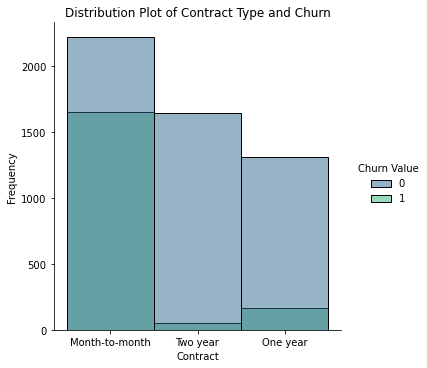

In [138]:
sns.displot(data=df, x='Contract', hue='Churn Value', kind='hist',  palette='viridis', bins=20)
plt.title('Distribution Plot of Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.show()

In [136]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
